In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_samples = []
train_labels = []

for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

Keras Sequential Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [ ]:
model = Sequential([
      Dense(units=16, input_shape=(1,), activation='relu'),
      Dense(units=32, activation='relu'),
      Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


Train the Neural Network

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.6592 - accuracy: 0.5291 - val_loss: 0.6451 - val_accuracy: 0.6238
Epoch 2/30
189/189 - 0s - loss: 0.6379 - accuracy: 0.6280 - val_loss: 0.6193 - val_accuracy: 0.7238
Epoch 3/30
189/189 - 0s - loss: 0.6098 - accuracy: 0.7063 - val_loss: 0.5921 - val_accuracy: 0.7524
Epoch 4/30
189/189 - 0s - loss: 0.5841 - accuracy: 0.7370 - val_loss: 0.5682 - val_accuracy: 0.7810
Epoch 5/30
189/189 - 0s - loss: 0.5593 - accuracy: 0.7693 - val_loss: 0.5456 - val_accuracy: 0.7952
Epoch 6/30
189/189 - 0s - loss: 0.5347 - accuracy: 0.7915 - val_loss: 0.5226 - val_accuracy: 0.8000
Epoch 7/30
189/189 - 0s - loss: 0.5111 - accuracy: 0.8074 - val_loss: 0.5019 - val_accuracy: 0.8286
Epoch 8/30
189/189 - 0s - loss: 0.4886 - accuracy: 0.8280 - val_loss: 0.4823 - val_accuracy: 0.8333
Epoch 9/30
189/189 - 0s - loss: 0.4676 - accuracy: 0.8439 - val_loss: 0.4646 - val_accuracy: 0.8429
Epoch 10/30
189/189 - 0s - loss: 0.4484 - accuracy: 0.8513 - val_loss: 0.4489 - val_accuracy: 0.8524

Proprocess Test Data

In [ ]:
test_labels = []
test_samples = []

for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [ ]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

Predict

In [ ]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [ ]:
predictions

array([[0.6979316 , 0.30206838],
       [0.9383728 , 0.06162723],
       [0.08487572, 0.91512424],
       [0.0681377 , 0.93186235],
       [0.09459439, 0.9054056 ],
       [0.9292341 , 0.07076589],
       [0.870118  , 0.12988201],
       [0.939631  , 0.06036906],
       [0.01419017, 0.98580986],
       [0.61779696, 0.382203  ],
       [0.8993356 , 0.10066439],
       [0.90696937, 0.09303056],
       [0.8252007 , 0.17479935],
       [0.02636271, 0.97363734],
       [0.15931262, 0.84068733],
       [0.04027792, 0.95972204],
       [0.3562743 , 0.6437257 ],
       [0.870118  , 0.12988201],
       [0.3294533 , 0.67054665],
       [0.9292341 , 0.07076589],
       [0.3562743 , 0.6437257 ],
       [0.02636271, 0.97363734],
       [0.233795  , 0.766205  ],
       [0.870118  , 0.12988201],
       [0.01419017, 0.98580986],
       [0.05505431, 0.9449457 ],
       [0.9357091 , 0.06429087],
       [0.58931184, 0.4106882 ],
       [0.19385104, 0.80614895],
       [0.9377345 , 0.06226546],
       [0.

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
rounded_predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without Normalization")

  print(cm)

  thresh = cm.max() / 2.0

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('True label')


Confusion Matrix without Normalization
[[186  24]
 [ 10 200]]


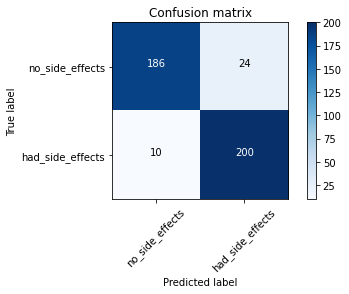

In [ ]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

Save a Model

In [ ]:
import os.path
if os.path.isfile('medical_trial_model.h5') is False:
  model.save('medical_trial_model.h5')
  print("Model Saved!")

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.get_weights()

[array([[ 0.658495  , -0.57884365,  0.5766728 , -0.4186311 , -0.45432907,
         -0.01517761,  0.08068924, -0.07213491,  0.3457575 , -0.28450316,
          0.2807092 , -0.38630718, -0.57006836, -0.17407686,  0.4774697 ,
          0.48209918]], dtype=float32),
 array([-0.11281551,  0.        , -0.12681632,  0.        ,  0.        ,
         0.        ,  0.24590242,  0.        , -0.09091264,  0.        ,
        -0.08369508,  0.        ,  0.        ,  0.        , -0.09601183,
        -0.1221495 ], dtype=float32),
 array([[-0.04046595,  0.39698634,  0.35735756, -0.24532634, -0.16593158,
          0.30845317,  0.34917107, -0.27576414, -0.20099992, -0.22190341,
         -0.3663994 , -0.23690987,  0.38386333,  0.07708398,  0.41189143,
          0.23054412,  0.12123533, -0.3438299 ,  0.20011172,  0.09990514,
          0.5223809 , -0.18318588, -0.08146498, -0.25972894,  0.28303325,
          0.27940306,  0.30553862, -0.10511122, -0.07770795, -0.33227167,
         -0.4902872 , -0.46147928],
 

In [ ]:
new_model.optimizer

Model to JSON

In [ ]:
json_string = model.to_json()

In [ ]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_3_input"}}, {"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [ ]:
model_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


Save Weights of a model

In [ ]:
import os.path
if os.path.isfile('my_model_weights.h5') is False:
  model.save_weights('my_model_weights.h5')
  print("Model Saved!")


In [ ]:
model2 = Sequential([
      Dense(units=16, input_shape=(1,), activation='relu'),
      Dense(units=32, activation='relu'),
      Dense(units=2, activation='softmax')
])

In [ ]:
model2.load_weights('my_model_weights.h5')

In [ ]:
model2.get_weights()

[array([[ 0.658495  , -0.57884365,  0.5766728 , -0.4186311 , -0.45432907,
         -0.01517761,  0.08068924, -0.07213491,  0.3457575 , -0.28450316,
          0.2807092 , -0.38630718, -0.57006836, -0.17407686,  0.4774697 ,
          0.48209918]], dtype=float32),
 array([-0.11281551,  0.        , -0.12681632,  0.        ,  0.        ,
         0.        ,  0.24590242,  0.        , -0.09091264,  0.        ,
        -0.08369508,  0.        ,  0.        ,  0.        , -0.09601183,
        -0.1221495 ], dtype=float32),
 array([[-0.04046595,  0.39698634,  0.35735756, -0.24532634, -0.16593158,
          0.30845317,  0.34917107, -0.27576414, -0.20099992, -0.22190341,
         -0.3663994 , -0.23690987,  0.38386333,  0.07708398,  0.41189143,
          0.23054412,  0.12123533, -0.3438299 ,  0.20011172,  0.09990514,
          0.5223809 , -0.18318588, -0.08146498, -0.25972894,  0.28303325,
          0.27940306,  0.30553862, -0.10511122, -0.07770795, -0.33227167,
         -0.4902872 , -0.46147928],
 